In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('Hr.csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [13]:
#checking the the columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [64]:
#checking the missing values
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [47]:
#creating the  new columns of annual income and annual income rate
df['annual_income']=df['MonthlyIncome']*12
df['annual_rate']=df['MonthlyRate']*12

In [65]:
#making the aggreagation of department with the thier total annual income
depart_annual=df.groupby('Department')['annual_income'].sum()
type(depart_annual)

#creating the df showing the department and thier sum of annual income
depart_annual_df=pd.DataFrame(depart_annual.values,index=depart_annual.index,columns=['sum_of_annual_income'])
#convert the DataFrame into csv file
depart_annual_df.to_csv('depart_annual_income.csv')
pd.read_csv('depart_annual_income.csv')

,Department,sum_of_annual_income
0,Human Resources,5030808
1,Research & Development,72877356
2,Sales,37620384


In [66]:
#making the aggreagation of jobrole with the thier total annual income

job_annual=df.groupby(['JobRole'])['annual_income'].sum()

#creating the df showing the jobrole and thier sum of annual income
job_annual_df=pd.DataFrame(job_annual.values,index=job_annual.index,columns=['sum_of_annual_income'])

#convert the DataFrame into csv file
job_annual_df.to_csv('jobrole_annual_income.csv')
pd.read_csv('jobrole_annual_income.csv')

,JobRole,sum_of_annual_income
0,Healthcare Representative,11955108
1,Human Resources,2643108
2,Laboratory Technician,10144824
3,Manager,21030372
4,Manufacturing Director,12886476
5,Research Director,15392208
6,Research Scientist,11398284
7,Sales Executive,27427080
8,Sales Representative,2651088


<Axes: xlabel='Department'>

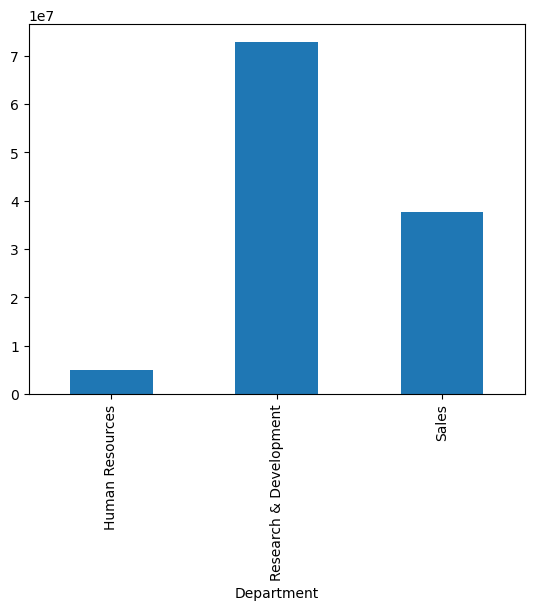

In [24]:
df.groupby('Department')['annual_income'].sum().plot(kind='bar')

In [67]:
#making the variation  of yearsatwork of employee with the their total annual income

total_work_annual=df.groupby('TotalWorkingYears')['annual_income'].sum()#.plot(kind='bar')

#creating the df showing the total yearsworkatcompany and thier sum of annual income
total_work_annual_df=pd.DataFrame(total_work_annual.values,index=total_work_annual.index,columns=['sum_of_annual_income'])
total_work_annual_df.to_csv('total_work_annual.csv')
pd.read_csv('total_work_annual.csv')

,TotalWorkingYears,sum_of_annual_income
0,0,201120
1,1,2146980
2,2,985872
3,3,1401648
4,4,2732508
5,5,3752364
6,6,6449436
7,7,4054512
8,8,5202636
9,9,7750056


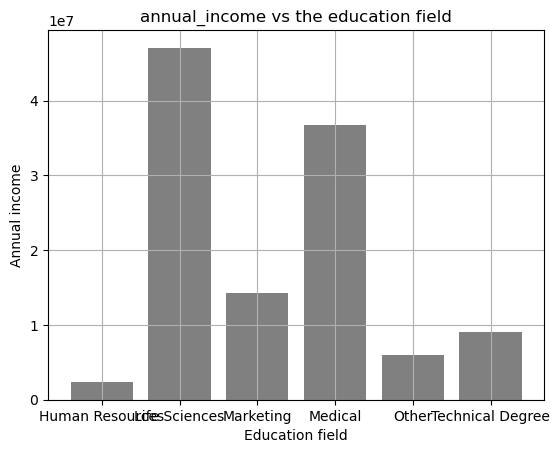

In [61]:
educ_annual_income=df.groupby(['EducationField'])['annual_income'].sum()
educ_annual_income.values,educ_annual_income.index

plt.bar(educ_annual_income.index,educ_annual_income.values,color='grey')
plt.title('annual_income vs the education field')
plt.xlabel('Education field')
plt.ylabel('Annual income')
plt.grid()
plt.show()

In [69]:

educ_annual_income_df=pd.DataFrame(educ_annual_income.values,index=educ_annual_income.index,columns=['sum_of_annual_income']).sort_values('sum_of_annual_income',ascending=False)
educ_annual_income_df.to_csv('educ_annual_income.csv')
pd.read_csv('educ_annual_income.csv')

,EducationField,sum_of_annual_income
0,Life Sciences,47074740
1,Medical,36680808
2,Marketing,14295720
3,Technical Degree,9121152
4,Other,6009996
5,Human Resources,2346132
